In [1]:
#IMPORTING DEPENDENCIES

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import metrics

In [2]:
insurance_dataset = pd.read_csv('/content/insurance._cost_prediction.csv')

In [3]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_dataset.shape

(1338, 7)

In [5]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical features

SEX 

SMOKER

REGION


In [6]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
#Data Analysis measurement statistical dataset 

insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<ipython-input-8-8465438dc0ef>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


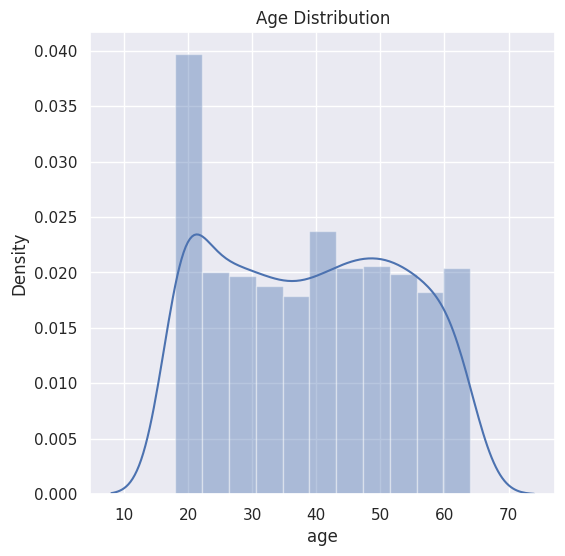

In [8]:
#Distribution of age value

sns.set()

plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

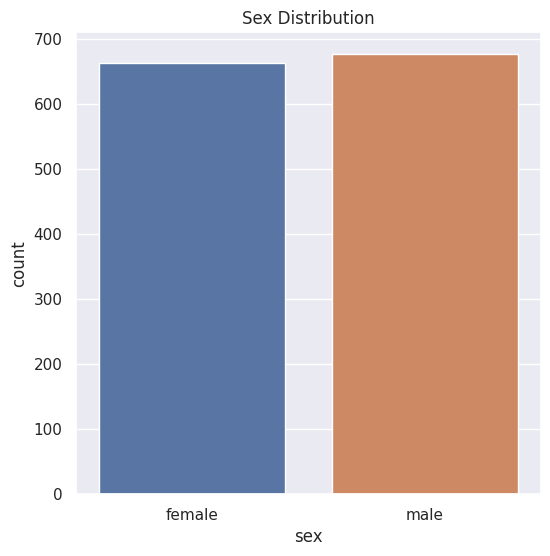

In [9]:
#Gender column

plt.figure(figsize=(6,6))
sns.countplot(x ='sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [10]:
insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<ipython-input-11-aed3880ccf98>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])


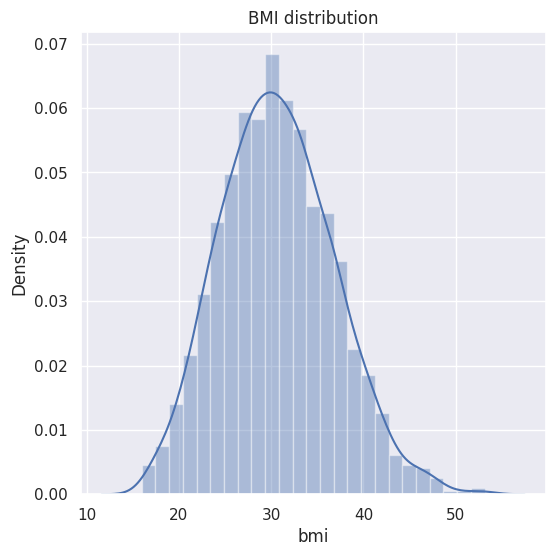

In [11]:
# BMI distributin 

plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI distribution')
plt.show()

Normal bmi range is 18.5 to 24.9


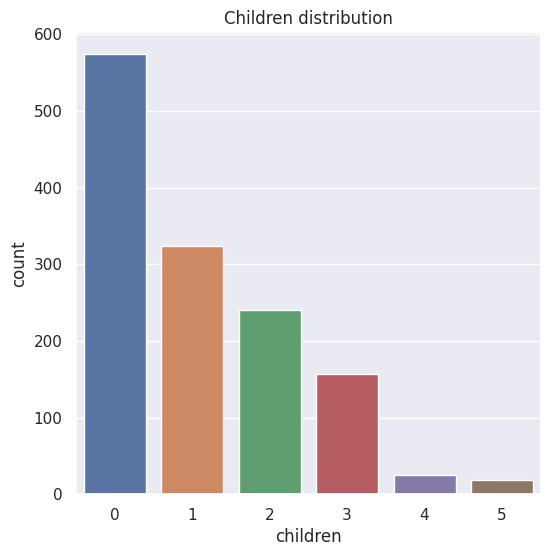

In [12]:
#Children column

plt.figure(figsize=(6,6))
sns.countplot(x= 'children',data = insurance_dataset)
plt.title('Children distribution')
plt.show()


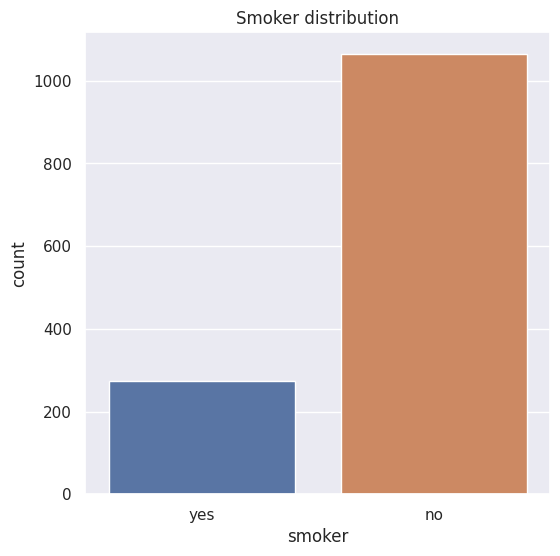

In [13]:
#smoker column

plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance_dataset)
plt.title('Smoker distribution')
plt.show()

In [14]:
insurance_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

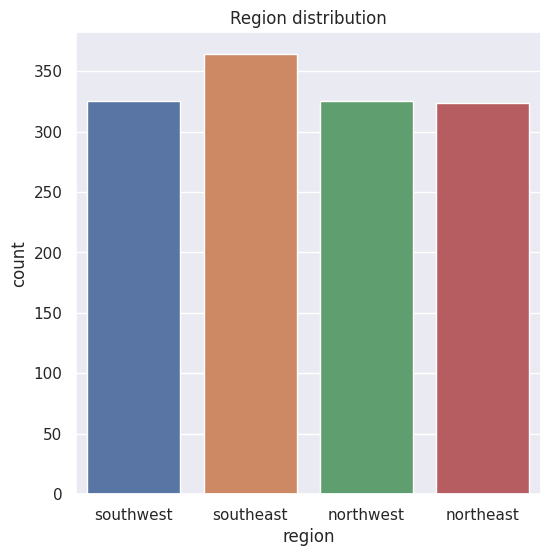

In [15]:
# Region distribution
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_dataset)
plt.title('Region distribution')
plt.show()

In [16]:
insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<ipython-input-17-d246c27ded47>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['charges'])


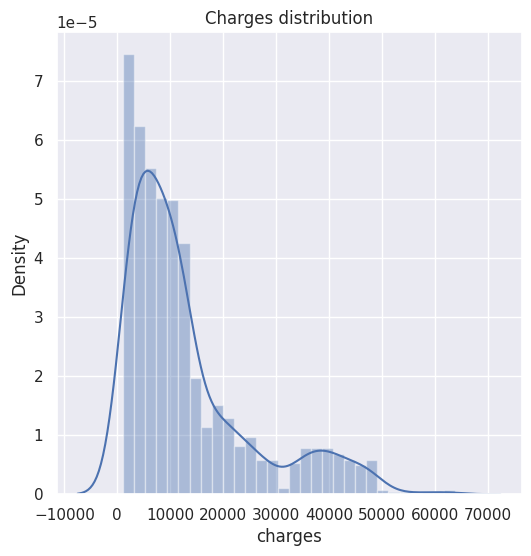

In [17]:
#Charges distribution

plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('Charges distribution')
plt.show()


DATA PRE-PROCESSING

Encoding categorical features

In [18]:
#encoding sex column

insurance_dataset.replace({'sex':{'male':0,'female':1}},inplace=True)


#encoding smoker column

insurance_dataset.replace({'smoker':{"yes":0,'no':1}},inplace=True)

#encoding region column

insurance_dataset.replace({'region':{'southeast':0,"southwest":1,"northeast":2,'northwest':3}},inplace=True)

Splitting the features and Target


In [19]:
x = insurance_dataset.drop(columns='charges',axis=1)
y = insurance_dataset['charges']

In [20]:
print(x)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [21]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Splitting data into training data & target data

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [24]:
print(x.shape,x_train.shape,x_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Trainig

Linear regression

In [27]:
#loading the linear regression model

regressor = LinearRegression()


In [29]:
regressor.fit(x_train, y_train)

LinearRegression()

Model evaluation

In [30]:
#prediction on training data 
training_data_predict = regressor.predict(x_train)

In [31]:
# R square value 
r2_train = metrics.r2_score(y_train, training_data_predict)

print('R squared value of:',r2_train)

R squared value of: 0.751505643411174


In [32]:
# prediction on test data

test_data_prediction = regressor.predict(x_test)

In [33]:
# R square value of test
r2_test = metrics.r2_score(y_test,test_data_prediction)
print('test R squared value of:',r2_test)

test R squared value of: 0.7447273869684076


Building a predictive system

In [37]:
input_data = (31,1,25.74,0,1,0)

#Changing input_data to a numpy array

input_data_num_array = np.asarray(input_data)

#reshape the array

input_data_reshape = input_data_num_array.reshape(1,-1)

prediction =regressor.predict(input_data_reshape)

print('The insurance cost of $:',prediction[0])

The insurance cost of $: 3760.080576496057


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
